# Heart Disease Prediction

## Import the required libraries 


In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import the `heart` dataset 

In [2]:
df = pd.read_csv("heart.csv")
print("The Shape of the Heart Dataset is {} ".format(df.shape))

The Shape of the Heart Dataset is (303, 14) 


### The Loaded dataset contains `303` rows and `14` columns

In [3]:
## To look at the first 5 rows of the data
print(df.head()) ## (or) print(df.head(5))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [4]:
df.tail() ## Last 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


 ## Data Cleaning 

### Looking for `missing` values and getting more `info`.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### from this info we come to know that there are `303` non-null values and all attributes are of `int64` expect `oldpeak` which is of `float64`.

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### From the above output we come to know that there is no missing values.

### Statistical measures

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### From the above output, we are interested only in some variables as others are categorical in our case here.


In [8]:
df[['age','trestbps','chol','thalach','oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [9]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

C:\DR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

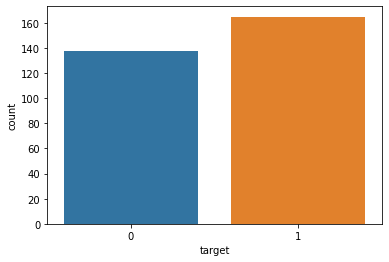

In [10]:
sns.countplot(df['target'])

### Splitting the data

In [11]:
X = df.drop('target',axis=1)
y = df['target']

In [12]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [13]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Spliting into training and test data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [16]:
print(X.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


In [17]:
print(y.shape,y_train.shape,y_test.shape)

(303,) (242,) (61,)


## Modelling 


### `Logistic Regression`

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression()

In [20]:
model.fit(X_train,y_train)

C:\DR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### ``Model Evaluation``

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
X_train_prediction = model.predict(X_train)
print("The accuracy score for training data is {}".format(accuracy_score(X_train_prediction,y_train)))

The accuracy score for training data is 0.8512396694214877


In [23]:
X_test_prediction = model.predict(X_test)
print("The accuracy score for training data is {}".format(accuracy_score(X_test_prediction,y_test)))

The accuracy score for training data is 0.819672131147541


### Model Testing

In [24]:
### row 130 
df.iloc[130]

age          54.0
sex           0.0
cp            2.0
trestbps    160.0
chol        201.0
fbs           0.0
restecg       1.0
thalach     163.0
exang         0.0
oldpeak       0.0
slope         2.0
ca            1.0
thal          2.0
target        1.0
Name: 130, dtype: float64

In [25]:
### row 170
df.iloc[170]

age          56.0
sex           1.0
cp            2.0
trestbps    130.0
chol        256.0
fbs           1.0
restecg       0.0
thalach     142.0
exang         1.0
oldpeak       0.6
slope         1.0
ca            1.0
thal          1.0
target        0.0
Name: 170, dtype: float64

In [26]:
##inp = (54,0,2,160,201,0,1,163,0,0,2,1,2) 

inp = (56,1,2,130,256,1,0,142,1,0.6,1,1,1)
### convert it to numpy array

inp1 = np.asarray(inp)

## reshape the data

input_data = inp1.reshape(1,-1)

prediction = model.predict(input_data)
print(prediction)

if(prediction[0]==0):
    print("The person does not have Heart Disease")
else:
    print("The person have Heart Disease")

[1]
The person have Heart Disease
